<a href="https://colab.research.google.com/github/2303a51667/abhirammudumba/blob/main/Lab%206.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Step 1: Load the classified dataset into a DataFrame
# Replace 'your_dataset.csv' with the path to your dataset
df = pd.read_csv('Classified_Data.txt')

# Step 2: Check the data types of each feature (column) in the dataset
data_types = df.dtypes
print("Data Types:\n", data_types)

# Step 3: Generate a summary of the dataset
summary = df.describe(percentiles=[.25, .5, .75, .90])
print("\nSummary Statistics:\n", summary)

# Step 4: List the names of columns/features in the dataset
columns = df.columns.tolist()
print("\nColumn Names:\n", columns)

# Step 5: Scale the features using StandardScaler
# Assuming the last column is the target variable (class label)
features = df.iloc[:, :-1]  # All columns except the last one
target = df.iloc[:, -1]      # Last column as the target

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Create a new DataFrame with scaled features
df_scaled = pd.DataFrame(features_scaled, columns=features.columns)

print("\nScaled Features:\n", df_scaled.head())

Data Types:
 Unnamed: 0        int64
WTT             float64
PTI             float64
EQW             float64
SBI             float64
LQE             float64
QWG             float64
FDJ             float64
PJF             float64
HQE             float64
NXJ             float64
TARGET CLASS      int64
dtype: object

Summary Statistics:
         Unnamed: 0          WTT          PTI          EQW          SBI  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean    499.500000     0.949682     1.114303     0.834127     0.682099   
std     288.819436     0.289635     0.257085     0.291554     0.229645   
min       0.000000     0.174412     0.441398     0.170924     0.045027   
25%     249.750000     0.742358     0.942071     0.615451     0.515010   
50%     499.500000     0.940475     1.118486     0.813264     0.676835   
75%     749.250000     1.163295     1.307904     1.028340     0.834317   
90%     899.100000     1.336612     1.441901     1.223127     0.983470 

Accuracy: 90.00%

Confusion Matrix:
[[ 8  2]
 [ 0 10]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.83      1.00      0.91        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90      0.90        20



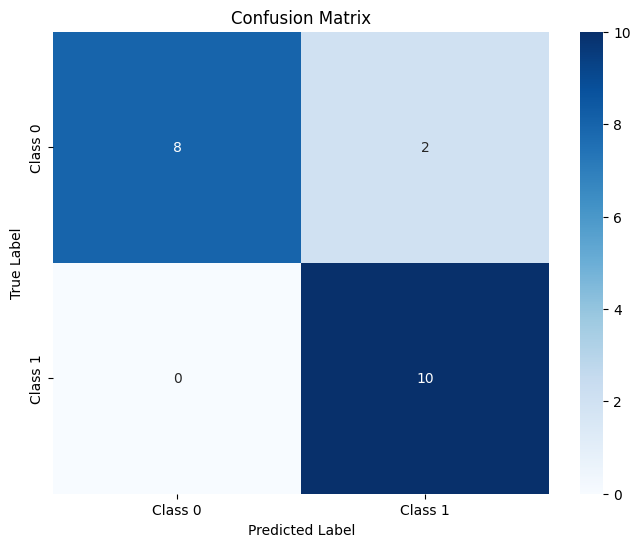

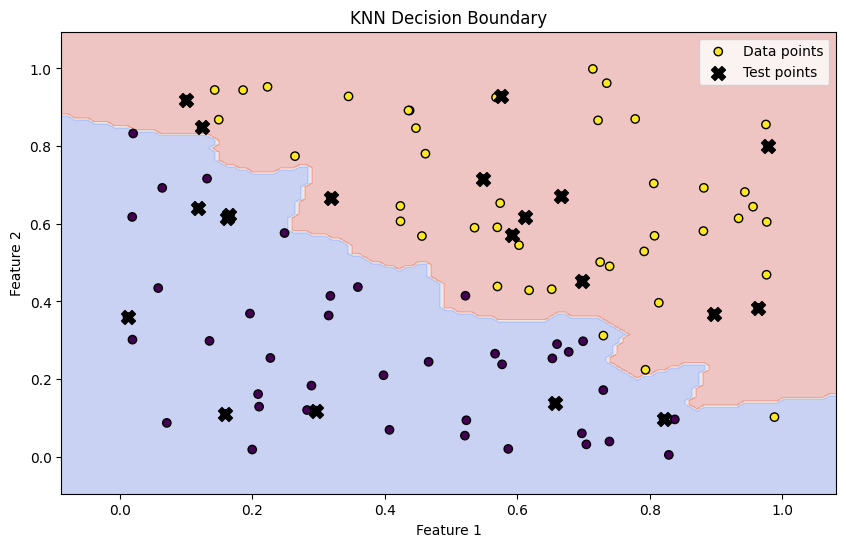

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 1: Generate synthetic data
np.random.seed(0)
X = np.random.rand(100, 2)  # 100 samples, 2 features
Y = (X[:, 0] + X[:, 1] > 1).astype(int)  # Simple binary classification

# Step 2: Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Step 3: Apply the KNN Classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Step 4: Fit the data to the Classifier Model
knn.fit(X_train, Y_train)

# Step 5: Make predictions
Y_pred = knn.predict(X_test)

# Step 6: Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Step 7: Generate the confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Step 8: Generate the classification report
class_report = classification_report(Y_test, Y_pred)
print("\nClassification Report:")
print(class_report)

# Step 9: Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Step 10: Plotting the decision boundary
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', marker='o', label='Data points')
plt.scatter(X_test[:, 0], X_test[:, 1], c='black', edgecolors='k', marker='X', s=100, label='Test points')
plt.title('KNN Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()